In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/dados_gerais_tratado.csv')

In [3]:
# Criar um dataframe com as unidades de acolhimento
df_unidade_acolhimento = pd.read_csv('../data/unidades_acolhimento/Censo_SUAS_2023_Unidade_Acolhimento_Dados_Gerais.csv', sep=';', encoding='latin1', low_memory=False)

# Análise de boas práticas no Serviço de Família Acolhedora (SFA)

## Análise da proporção de acolhidos na unidade de acolhimento em relação às crianças e aos adolescentes acolhidos por meio do SFA

In [4]:
df_unidade_acolhimento['NU_IDENTIFICADOR'].apply(type).unique()

array([<class 'int'>], dtype=object)

In [5]:
# Criar uma lista com nomes para as colunas, de forma a compreender melhor os dados
rename_cols_uni = {
    'q11':'qtd_pessoas_acolhidas',
    'q14_1_1':'qtd_masc_0_2',
    'q14_1_2':'qtd_masc_3_5',
    'q14_1_3':'qtd_masc_6_11',
    'q14_1_4':'qtd_masc_12_13',
    'q14_1_5':'qtd_masc_14_15',
    'q14_1_6':'qtd_masc_16_17',
    'q14_1_7':'qtd_masc_18_21',    
    'q14_1_8':'qtd_masc_22_59',
    'q14_1_9':'qtd_masc_60_79',
    'q14_1_10':'qtd_masc_acima_80',      
    'q14_1_11':'qtd_masc_total',
    'q14_2_1':'qtd_fem_0_2',
    'q14_2_2':'qtd_fem_3_5',
    'q14_2_3':'qtd_fem_6_11',
    'q14_2_4':'qtd_fem_12_13',
    'q14_2_5':'qtd_fem_14_15',
    'q14_2_6':'qtd_fem_16_17',
    'q14_2_7':'qtd_fem_18_21',    
    'q14_2_8':'qtd_fem_22_59',
    'q14_2_9':'qtd_fem_60_79',
    'q14_2_10':'qtd_fem_acima_80', 
    'q14_2_11':'qtd_fem_total',      
}

In [6]:
# Renomear as colunas do dataframe de unidades de acolhimento de acordo com a lista criada
df_unidade_acolhimento = df_unidade_acolhimento.rename(columns=rename_cols_uni)

In [7]:
# Criar uma lista para filtrar o dataframe de unidades acolhedoras
filter_pessoas_uni = ['NU_IDENTIFICADOR',
    'IBGE',
    'qtd_pessoas_acolhidas',
    'qtd_masc_0_2',
    'qtd_masc_3_5',
    'qtd_masc_6_11',
    'qtd_masc_12_13',
    'qtd_masc_14_15',
    'qtd_masc_16_17',
    'qtd_masc_18_21',    
    'qtd_masc_22_59',
    'qtd_masc_60_79',
    'qtd_masc_acima_80',      
    'qtd_masc_total',
    'qtd_fem_0_2',
    'qtd_fem_3_5',
    'qtd_fem_6_11',
    'qtd_fem_12_13',
    'qtd_fem_14_15',
    'qtd_fem_16_17',
    'qtd_fem_18_21',    
    'qtd_fem_22_59',
    'qtd_fem_60_79',
    'qtd_fem_acima_80', 
    'qtd_fem_total']

In [8]:
# Criar um dataframe a partir do filtro de pessoas acolhidas
df_pessoas_uni_acolhi = df_unidade_acolhimento[filter_pessoas_uni]

In [9]:
# As colunas são tipo object o que significa que elas têm tipo string no meio o que vai impactar na soma
print(df_pessoas_uni_acolhi[['NU_IDENTIFICADOR', 'IBGE', 'qtd_pessoas_acolhidas', 'qtd_masc_0_2',
       'qtd_masc_3_5', 'qtd_masc_6_11', 'qtd_masc_12_13', 'qtd_masc_14_15',
       'qtd_masc_16_17', 'qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79',
       'qtd_masc_acima_80', 'qtd_masc_total', 'qtd_fem_0_2', 'qtd_fem_3_5',
       'qtd_fem_6_11', 'qtd_fem_12_13', 'qtd_fem_14_15', 'qtd_fem_16_17',
       'qtd_fem_18_21', 'qtd_fem_22_59', 'qtd_fem_60_79', 'qtd_fem_acima_80',
       'qtd_fem_total']].dtypes)

NU_IDENTIFICADOR          int64
IBGE                      int64
qtd_pessoas_acolhidas    object
qtd_masc_0_2             object
qtd_masc_3_5             object
qtd_masc_6_11            object
qtd_masc_12_13           object
qtd_masc_14_15           object
qtd_masc_16_17           object
qtd_masc_18_21           object
qtd_masc_22_59           object
qtd_masc_60_79           object
qtd_masc_acima_80        object
qtd_masc_total           object
qtd_fem_0_2              object
qtd_fem_3_5              object
qtd_fem_6_11             object
qtd_fem_12_13            object
qtd_fem_14_15            object
qtd_fem_16_17            object
qtd_fem_18_21            object
qtd_fem_22_59            object
qtd_fem_60_79            object
qtd_fem_acima_80         object
qtd_fem_total            object
dtype: object


In [10]:
# Fazer uma cópia explícita do DataFrame (opcional, mas recomendado)
df_pessoas_uni_acolhi = df_pessoas_uni_acolhi.copy()

# Converter colunas para tipo numérico e depois para inteiro
cols_para_converter = [
    'qtd_pessoas_acolhidas', 'qtd_masc_0_2',
    'qtd_masc_3_5', 'qtd_masc_6_11', 'qtd_masc_12_13', 'qtd_masc_14_15',
    'qtd_masc_16_17', 'qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79',
    'qtd_masc_acima_80', 'qtd_masc_total', 'qtd_fem_0_2', 'qtd_fem_3_5',
    'qtd_fem_6_11', 'qtd_fem_12_13', 'qtd_fem_14_15', 'qtd_fem_16_17',
    'qtd_fem_18_21', 'qtd_fem_22_59', 'qtd_fem_60_79', 'qtd_fem_acima_80',
    'qtd_fem_total'
]

In [11]:
# Limpeza adicional das colunas
for col in cols_para_converter:
    df_pessoas_uni_acolhi[col] = (
        df_pessoas_uni_acolhi[col]
        .astype(str)  # Converter para string
        .str.strip()  # Remover espaços em branco no início e fim
        .str.replace(r'\D', '', regex=True)  # Remover qualquer caractere que não seja dígito
        .replace('', '0')  # Substituir strings vazias por '0'
    )

# Converter para numérico e depois para inteiro
df_pessoas_uni_acolhi[cols_para_converter] = (
    df_pessoas_uni_acolhi[cols_para_converter]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
    .astype(int)
)

# Verificar os tipos de dados após a conversão
print(df_pessoas_uni_acolhi[cols_para_converter].dtypes)

qtd_pessoas_acolhidas    int64
qtd_masc_0_2             int64
qtd_masc_3_5             int64
qtd_masc_6_11            int64
qtd_masc_12_13           int64
qtd_masc_14_15           int64
qtd_masc_16_17           int64
qtd_masc_18_21           int64
qtd_masc_22_59           int64
qtd_masc_60_79           int64
qtd_masc_acima_80        int64
qtd_masc_total           int64
qtd_fem_0_2              int64
qtd_fem_3_5              int64
qtd_fem_6_11             int64
qtd_fem_12_13            int64
qtd_fem_14_15            int64
qtd_fem_16_17            int64
qtd_fem_18_21            int64
qtd_fem_22_59            int64
qtd_fem_60_79            int64
qtd_fem_acima_80         int64
qtd_fem_total            int64
dtype: object


In [12]:
df_pessoas_uni_acolhi = df_pessoas_uni_acolhi.copy()

# Criar a coluna 'qtd_masc_acima_18' somando as faixas etárias acima de 18 anos para masculino
df_pessoas_uni_acolhi['qtd_masc_acima_18'] = (
    df_pessoas_uni_acolhi[['qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79', 'qtd_masc_acima_80']]
    .sum(axis=1)
)

In [13]:
# Criar a coluna 'qtd_fem_acima_18' somando as faixas etárias acima de 18 anos para feminino
df_pessoas_uni_acolhi['qtd_fem_acima_18'] = (
    df_pessoas_uni_acolhi[['qtd_fem_18_21', 'qtd_fem_22_59', 'qtd_fem_60_79', 'qtd_fem_acima_80']]
    .sum(axis=1)
)

In [14]:
# Criar uma cópia explícita para evitar o SettingWithCopyWarning
df_verificacao = df_pessoas_uni_acolhi[['qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79', 'qtd_masc_acima_80', 'qtd_masc_acima_18']].copy()

# Calcular a soma manualmente usando .loc[]
df_verificacao.loc[:, 'soma_manual'] = df_verificacao[['qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79', 'qtd_masc_acima_80']].sum(axis=1)

# Calcular a diferença usando .loc[]
df_verificacao.loc[:, 'diferenca'] = df_verificacao['qtd_masc_acima_18'] - df_verificacao['soma_manual']

In [15]:
print(df_pessoas_uni_acolhi.columns.tolist())

['NU_IDENTIFICADOR', 'IBGE', 'qtd_pessoas_acolhidas', 'qtd_masc_0_2', 'qtd_masc_3_5', 'qtd_masc_6_11', 'qtd_masc_12_13', 'qtd_masc_14_15', 'qtd_masc_16_17', 'qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79', 'qtd_masc_acima_80', 'qtd_masc_total', 'qtd_fem_0_2', 'qtd_fem_3_5', 'qtd_fem_6_11', 'qtd_fem_12_13', 'qtd_fem_14_15', 'qtd_fem_16_17', 'qtd_fem_18_21', 'qtd_fem_22_59', 'qtd_fem_60_79', 'qtd_fem_acima_80', 'qtd_fem_total', 'qtd_masc_acima_18', 'qtd_fem_acima_18']


In [16]:
colunas_para_remover = [
    'NU_IDENTIFICADOR', 'qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79',
    'qtd_masc_acima_80', 'qtd_fem_18_21', 'qtd_fem_22_59', 'qtd_fem_60_79', 'qtd_fem_acima_80'
]

# Verificar quais colunas estão ausentes
colunas_existentes = [col for col in colunas_para_remover if col in df_pessoas_uni_acolhi.columns]
colunas_ausentes = [col for col in colunas_para_remover if col not in df_pessoas_uni_acolhi.columns]

print("Colunas existentes:", colunas_existentes)
print("Colunas ausentes:", colunas_ausentes)

Colunas existentes: ['NU_IDENTIFICADOR', 'qtd_masc_18_21', 'qtd_masc_22_59', 'qtd_masc_60_79', 'qtd_masc_acima_80', 'qtd_fem_18_21', 'qtd_fem_22_59', 'qtd_fem_60_79', 'qtd_fem_acima_80']
Colunas ausentes: []


In [17]:
df_pessoas_uni_acolhi = df_pessoas_uni_acolhi.drop(columns=colunas_existentes)

In [18]:
df_dados_gerais['qtd_fem_total'] = df_dados_gerais[['qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18']].sum(axis=1)

In [19]:
# Criar uma lista para filtrar o dataframe de famílias acolhedoras (dados_gerais)
filter_fam = ['NU_IDENTIFICADOR',
    'IBGE',
    'qtd_criancas_acolhidas',
    'qtd_masc_0_2',
    'qtd_masc_3_5',
    'qtd_masc_6_11',
    'qtd_masc_12_13',
    'qtd_masc_14_15',
    'qtd_masc_16_17',
    'qtd_masc_acima_18',
    'qtd_masc_total',
    'qtd_fem_0_2',
    'qtd_fem_3_5',
    'qtd_fem_6_11',
    'qtd_fem_12_13',
    'qtd_fem_14_15',
    'qtd_fem_16_17',
    'qtd_fem_acima_18',
    'qtd_fem_total',
]

In [20]:
# Verificou-se que a coluna NU_IDENTIFICADOR - que serve de link para as demais tabelas do Censo - no dataframe de dados gerais está como string (texto)
df_dados_gerais['NU_IDENTIFICADOR'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [21]:
# Criar um regex para retirar espaços vazios e as vírgulas para transformar a coluna em tipo inteiro
df_dados_gerais['NU_IDENTIFICADOR'] = df_dados_gerais['NU_IDENTIFICADOR'].str.replace(',', '.', regex=False).astype(float).astype(int)

In [22]:
print(df_dados_gerais[['NU_IDENTIFICADOR', 'IBGE', 'qtd_criancas_acolhidas', 'qtd_masc_0_2',
       'qtd_masc_3_5', 'qtd_masc_6_11', 'qtd_masc_12_13', 'qtd_masc_14_15',
       'qtd_masc_16_17', 'qtd_masc_acima_18', 'qtd_masc_total', 'qtd_fem_0_2',
       'qtd_fem_3_5', 'qtd_fem_6_11', 'qtd_fem_12_13', 'qtd_fem_14_15',
       'qtd_fem_16_17', 'qtd_fem_acima_18', 'qtd_fem_total']].dtypes)

NU_IDENTIFICADOR          int64
IBGE                      int64
qtd_criancas_acolhidas    int64
qtd_masc_0_2              int64
qtd_masc_3_5              int64
qtd_masc_6_11             int64
qtd_masc_12_13            int64
qtd_masc_14_15            int64
qtd_masc_16_17            int64
qtd_masc_acima_18         int64
qtd_masc_total            int64
qtd_fem_0_2               int64
qtd_fem_3_5               int64
qtd_fem_6_11              int64
qtd_fem_12_13             int64
qtd_fem_14_15             int64
qtd_fem_16_17             int64
qtd_fem_acima_18          int64
qtd_fem_total             int64
dtype: object


In [23]:
df_qtd_total_uni = df_pessoas_uni_acolhi.groupby('IBGE', as_index=False)[['qtd_pessoas_acolhidas', 'qtd_masc_total', 'qtd_fem_total']].sum()

In [24]:
df_qtd_uni_munic = df_qtd_total_uni[df_qtd_total_uni['IBGE'].between(100000, 999999)]

In [25]:
# Carregar os dados de município de acordo com o código do IBGE
df_municipios = pd.read_excel('../data/dados_geo/RELATORIO_DTB_BRASIL_MUNICIPIO.xls', header=6, engine='xlrd')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [26]:
# Fazer uma cópia explícita do DataFrame
df_qtd_uni_munic = df_qtd_uni_munic.copy()

# Padronizar a coluna IBGE no DataFrame 'df_qtd_total_municipios' para ter seis dígitos
df_qtd_uni_munic['IBGE'] = df_qtd_uni_munic['IBGE'].astype(str).str.zfill(6)

# Remover o dígito verificador (último dígito) da coluna 'Código Município Completo' no DataFrame 'municipios'
df_municipios['Código Município Completo'] = df_municipios['Código Município Completo'].astype(str).str[:-1]

# Padronizar para seis dígitos
df_municipios['Código Município Completo'] = df_municipios['Código Município Completo'].str.zfill(6)

# Realizar o merge entre os DataFrames
df_qtd_uni_municipios = pd.merge(
    df_qtd_uni_munic,
    df_municipios[['Nome_UF', 'Código Município Completo', 'Nome_Município']],
    left_on='IBGE',
    right_on='Código Município Completo',
    how='inner'
)

# Selecionar as colunas desejadas
df_qtd_uni_municipios = df_qtd_uni_municipios[['IBGE', 'Nome_Município', 'Nome_UF', 'qtd_pessoas_acolhidas', 'qtd_masc_total', 'qtd_fem_total']]

In [27]:
df_qtd_total_fam = df_dados_gerais.groupby('IBGE', as_index=False)[['qtd_criancas_acolhidas', 'qtd_masc_total', 'qtd_fem_total']].sum()

In [28]:
df_qtd_total_fam_munic = df_qtd_total_fam[df_qtd_total_fam['IBGE'].between(100000, 999999)]

In [29]:
# Fazer uma cópia explícita do DataFrame
df_qtd_total_fam_munic = df_qtd_total_fam_munic.copy()

# Padronizar a coluna IBGE no DataFrame 'df_qtd_total_municipios' para ter seis dígitos
df_qtd_total_fam_munic['IBGE'] = df_qtd_total_fam_munic['IBGE'].astype(str).str.zfill(6)

# Realizar o merge entre os DataFrames
df_qtd_fam_municipios = pd.merge(
    df_qtd_total_fam_munic,
    df_municipios[['Nome_UF', 'Código Município Completo', 'Nome_Município']],
    left_on='IBGE',
    right_on='Código Município Completo',
    how='inner'
)

# Selecionar as colunas desejadas
df_qtd_fam_municipios = df_qtd_fam_municipios[['IBGE', 'Nome_Município', 'Nome_UF', 'qtd_criancas_acolhidas', 'qtd_masc_total', 'qtd_fem_total']]

In [30]:
# Aqui dá pra perceber que a quantidade de municípios é diferente nos dois dataframes
print(df_qtd_uni_municipios.shape)
print(df_qtd_fam_municipios.shape)

(2278, 6)
(584, 6)


In [31]:
# Realizar o merge
df_uni_fam_munic = pd.merge(df_qtd_uni_municipios, df_qtd_fam_municipios,
                        on=['IBGE', 'Nome_Município', 'Nome_UF'],
                        how='left',
                        suffixes=('_unidades', '_familia'))

In [32]:
# Preencher valores nulos com zero
df_uni_fam_munic.fillna(0, inplace=True)

In [33]:
# Criar a variável pct_acolhidas_fam: percentual total de pessoas acolhidas pelo Família Acolhedora
df_uni_fam_munic['pct_total_acolhidos_fam'] = df_uni_fam_munic['qtd_criancas_acolhidas'] / df_uni_fam_munic['qtd_pessoas_acolhidas']

In [34]:
# Criar a variável pct_masc_acolhidos_fam: percentual total de meninos/homens acolhidos pelo Família Acolhedora
df_uni_fam_munic['pct_masc_acolhidos_fam'] = df_uni_fam_munic['qtd_masc_total_familia'] / df_uni_fam_munic['qtd_masc_total_unidades']

In [35]:
# Criar a variável pct_fem_acolhidas_fam: percentual total de meninas/mulheres acolhidas pelo Família Acolhedora
df_uni_fam_munic['pct_fem_acolhidas_fam'] = df_uni_fam_munic['qtd_fem_total_familia'] / df_uni_fam_munic['qtd_fem_total_unidades']

In [36]:
# Substituir valores infinitos (resultado de divisão por zero) por zero
df_uni_fam_munic.replace([float('inf'), -float('inf')], 0, inplace=True)

In [37]:
df_uni_fam_munic.head()

,IBGE,Nome_Município,Nome_UF,qtd_pessoas_acolhidas,qtd_masc_total_unidades,qtd_fem_total_unidades,qtd_criancas_acolhidas,qtd_masc_total_familia,qtd_fem_total_familia,pct_total_acolhidos_fam,pct_masc_acolhidos_fam,pct_fem_acolhidas_fam
0,110001,Alta Floresta D'Oeste,Rondônia,6,4,2,0.0,0.0,0.0,0.0,0.0,0.0
1,110002,Ariquemes,Rondônia,66,39,27,0.0,0.0,0.0,0.0,0.0,0.0
2,110003,Cabixi,Rondônia,4,2,2,0.0,0.0,0.0,0.0,0.0,0.0
3,110004,Cacoal,Rondônia,91,67,24,0.0,0.0,0.0,0.0,0.0,0.0
4,110005,Cerejeiras,Rondônia,4,3,1,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Agrupar os dados por UF e calcular as somas
df_uf_acolhimento = df_uni_fam_munic.groupby('Nome_UF').agg({
    'qtd_pessoas_acolhidas': 'sum',
    'qtd_criancas_acolhidas': 'sum'
}).reset_index()

# Calcular a proporção total de acolhimento pelo Família Acolhedora para cada UF
df_uf_acolhimento['pct_total_acolhidos_fam'] = df_uf_acolhimento['qtd_criancas_acolhidas'] / df_uf_acolhimento['qtd_pessoas_acolhidas']

In [39]:
df_uf_acolhimento.sort_values(by='pct_total_acolhidos_fam', ascending=False)

,Nome_UF,qtd_pessoas_acolhidas,qtd_criancas_acolhidas,pct_total_acolhidos_fam
3,Amazonas,607,36.0,0.059308
13,Paraná,10775,510.0,0.047332
23,Santa Catarina,4534,141.0,0.031098
11,Mato Grosso do Sul,2932,61.0,0.020805
9,Maranhão,538,11.0,0.020446
6,Distrito Federal,1660,28.0,0.016867
20,Rio de Janeiro,8189,129.0,0.015753
14,Paraíba,1016,16.0,0.015748
17,Piauí,640,9.0,0.014063
5,Ceará,2077,29.0,0.013962


## Análise dos estados com maior proporção de acolhidos no SFA e maior quantidade de famílias acolhedoras

Para evidenciar e analisar boas práticas, primeiro analisamos as quatro primeiras posições, em ordem decrescente, da quantidade de famílias acolhendo ou aptas a acolher conforme variável 'qtd_fam_aptas_ou_acolhendo'. Os seguintes estados, por ordem decrescente, foram selecionados:
- Paraná (PR): 817
- Minas Gerais (MG): 522
- Santa Catarina (SC): 432
- São Paulo (SP): 410

Observando os números dos estados acima, é possível identificar uma diferença significativa entre SP e o quinto colocado (Rio de Janeiro com 200 famílias), portanto, pela disparidade de quantidade, apenas os 4 primeiros foram selecionados.

Ao ordenarmos as cinco maiores proporções de acolhidos no SFA em relação ao total de acolhidos por UF, chegamos aos seguintes estados:
- Amazonas (AM): 0.059%
- Paraná (PR): 0.046%
- Santa Catarina (SC): 0.031%
- Mato Grosso do Sul (MS): 0.020%
- Maranhão (MA): 0.020%

A partir dessas duas listas, selecionamos os estados do Paraná (PR) e de Santa Catarina (SC) por configurarem em ambas as listas dos maiores quantitativos, assim, é possível identificar padrões, ações ou perfis desses estados que possam nos orientar a ter um diagnóstico de práticas que consolidam os números relacionados aos quantitativos de famílias e de crianças e adolescentes acolhidos e de porcentagem de acolhidos em relação ao total de acolhidos por UF.

### Subsídio mensal

In [40]:
# Transformar os dados em números
df_dados_gerais['subsidio_valor_mensal'] = pd.to_numeric(df_dados_gerais['subsidio_valor_mensal'], errors='coerce')

In [41]:
# Criar um dataframe apenas com as observações do Paraná
df_pr = df_dados_gerais[df_dados_gerais['uf'] == 'PR']
df_pr.shape

(131, 175)

In [42]:
# Criar um dataframe apenas com as observações de Santa Catarina
df_sc = df_dados_gerais[df_dados_gerais['uf'] == 'SC']
df_sc.shape

(105, 175)

In [43]:
df_pr['subsidio_valor_mensal'].fillna(0, inplace=True)
df_sc['subsidio_valor_mensal'].fillna(0, inplace=True)

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_2472/2438098985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr['subsidio_valor_mensal'].fillna(0, inplace=True)
/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_2472/2438098985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc['subsidio_valor_mensal'].fillna(0, inplace=True)


In [44]:
# Calcular os quartis e o intervalo interquartil (IQR)
q1 = df_dados_gerais['subsidio_valor_mensal'].quantile(0.25)
q3 = df_dados_gerais['subsidio_valor_mensal'].quantile(0.75)
iqr = q3 - q1

# Determinar o limite superior para outliers
limite_superior = q3 + 1.5 * iqr

# Filtrar os outliers
outliers = df_dados_gerais[df_dados_gerais['subsidio_valor_mensal'] > limite_superior]

# Exibir o limite superior para referência
print(f"Limite superior para outliers: {limite_superior}")

Limite superior para outliers: 1350.0


In [45]:
# Filtrar para manter apenas valores iguais ou abaixo de 13000
df_sem_outliers_pr = df_pr[df_pr['subsidio_valor_mensal'] < 13000]
df_sem_outliers_sc = df_sc[df_sc['subsidio_valor_mensal'] < 13000]

In [46]:
estatisticas_pr = df_sem_outliers_pr['subsidio_valor_mensal'].describe()
print("Estatísticas descritivas para PR:")
print(estatisticas_pr)

Estatísticas descritivas para PR:
count     130.000000
mean     1195.407692
std       480.815001
min         0.000000
25%      1320.000000
50%      1320.000000
75%      1320.000000
max      2369.000000
Name: subsidio_valor_mensal, dtype: float64


In [47]:
df_zero_subsidio_pr = df_sem_outliers_pr[df_sem_outliers_pr['subsidio_valor_mensal'] == 0]
df_zero_subsidio_pr.shape

(14, 175)

In [48]:
estatisticas_sc = df_sem_outliers_sc['subsidio_valor_mensal'].describe()
print("Estatísticas descritivas para SC:")
print(estatisticas_sc)

Estatísticas descritivas para SC:
count     104.000000
mean     1334.490385
std       538.056174
min         0.000000
25%      1320.000000
50%      1320.000000
75%      1320.000000
max      2640.000000
Name: subsidio_valor_mensal, dtype: float64


In [49]:
df_zero_subsidio_sc = df_sem_outliers_sc[df_sem_outliers_sc['subsidio_valor_mensal'] == 0]
df_zero_subsidio_sc.shape

(9, 175)

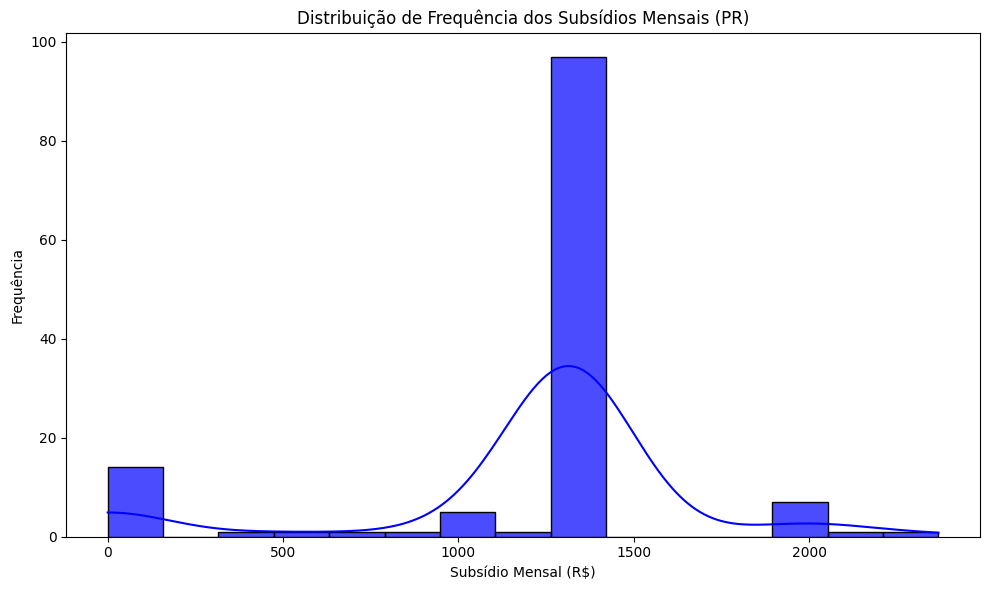

In [50]:
#  Criar um histograma com KDE para visualizar a frequência e o formato da distribuição dos valores do PR
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_sem_outliers_pr,
    x='subsidio_valor_mensal',
    kde=True,
    bins=15,
    color='blue',
    alpha=0.7
)

# Configurar o gráfico
plt.title('Distribuição de Frequência dos Subsídios Mensais (PR)')
plt.xlabel('Subsídio Mensal (R$)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

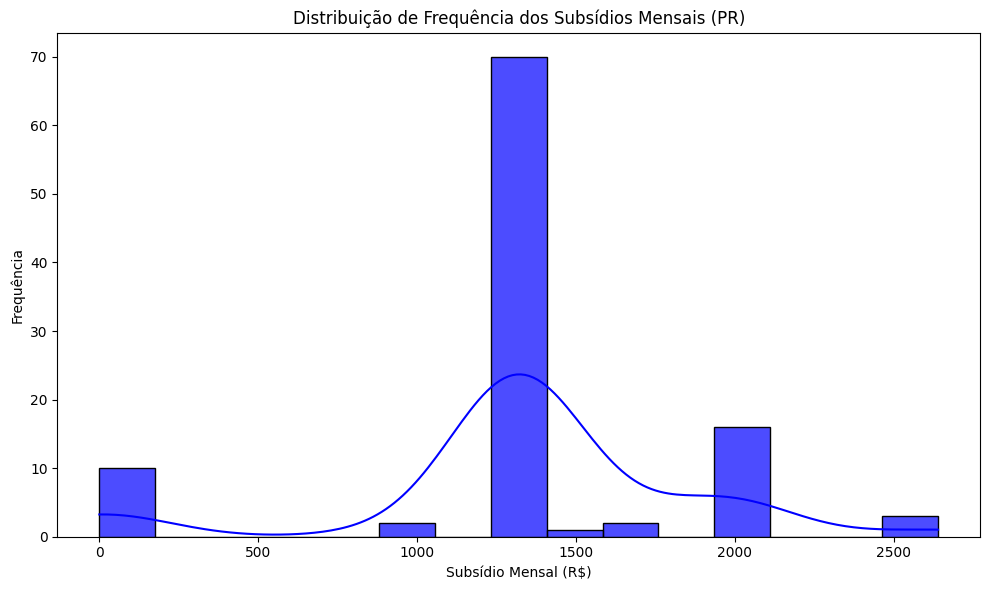

In [51]:
#  Criar um histograma com KDE para visualizar a frequência e o formato da distribuição dos valores do SC
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_sem_outliers_sc,
    x='subsidio_valor_mensal',
    kde=True,
    bins=15,
    color='blue',
    alpha=0.7
)

# Configurar o gráfico
plt.title('Distribuição de Frequência dos Subsídios Mensais (PR)')
plt.xlabel('Subsídio Mensal (R$)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Comparação entre famílias em processo de habilitação e famílias aptas ou acolhendo

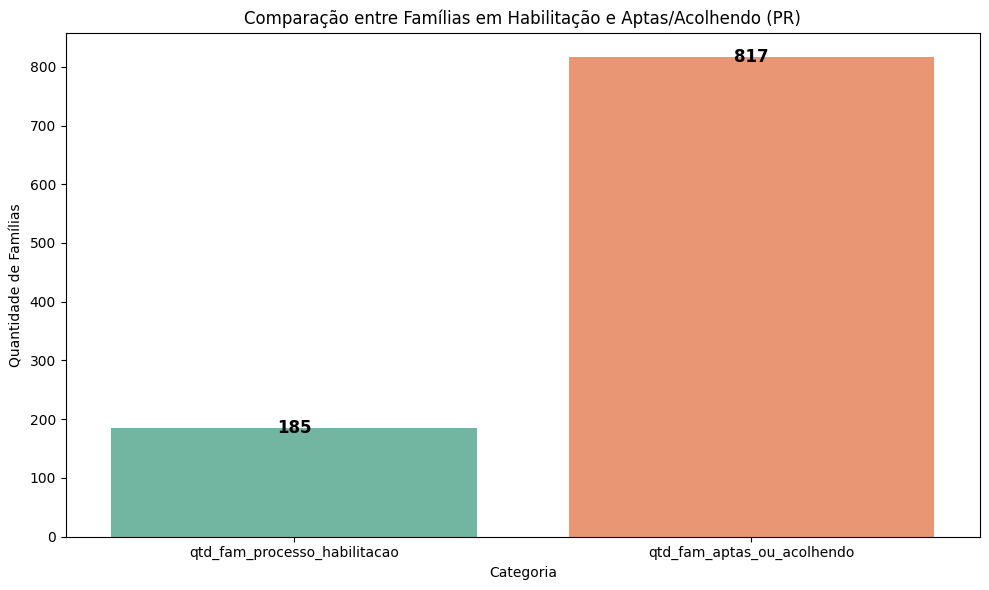

In [52]:
# Selecionar as colunas relevantes
df_pr_agrupado = df_pr[['qtd_fam_processo_habilitacao', 'qtd_fam_aptas_ou_acolhendo']].sum().reset_index()
df_pr_agrupado.columns = ['Categoria', 'Quantidade']

# Gráfico de barras para o Paraná
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Categoria', y='Quantidade', data=df_pr_agrupado, palette='Set2', hue='Categoria', legend=False)

# Adicionando os valores dentro das barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Coordenada X (meio da barra)
        p.get_height() + 0.5,          # Coordenada Y (acima da barra)
        int(p.get_height()),           # Valor a ser exibido
        ha='center',                   # Centralizar o texto horizontalmente
        va='center',                   # Centralizar o texto verticalmente
        fontsize=12,                   # Tamanho da fonte
        color='black',                 # Cor do texto
        weight='bold'                  # Negrito
    )

# Adicionando título e rótulos
plt.title('Comparação entre Famílias em Habilitação e Aptas/Acolhendo (PR)')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Famílias')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

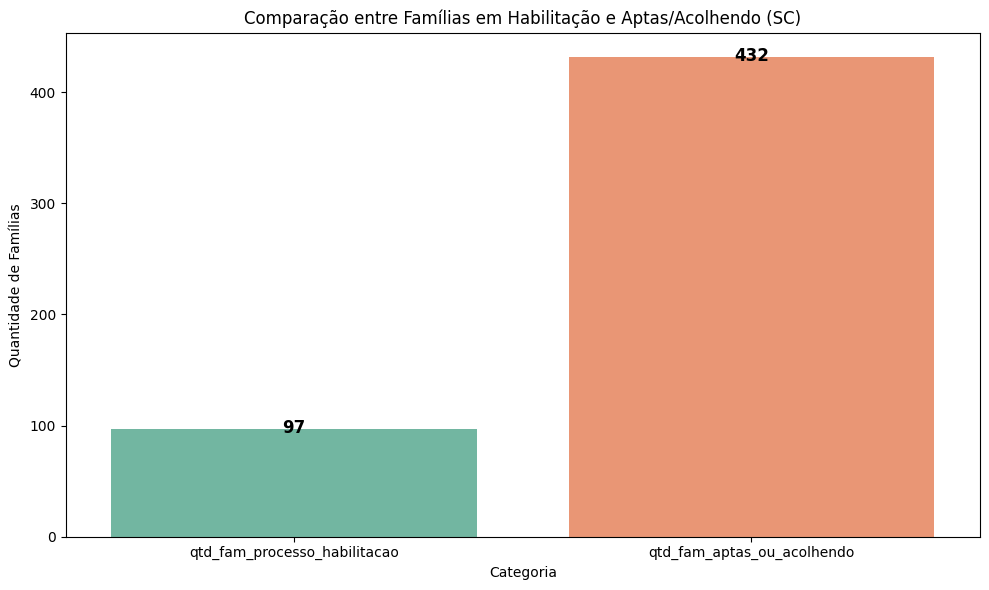

In [53]:
# Selecionar as colunas relevantes
df_sc_agrupado = df_sc[['qtd_fam_processo_habilitacao', 'qtd_fam_aptas_ou_acolhendo']].sum().reset_index()
df_sc_agrupado.columns = ['Categoria', 'Quantidade']

# Gráfico de barras para Santa Catarina
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Categoria', y='Quantidade', data=df_sc_agrupado, palette='Set2', hue='Categoria', legend=False)

# Adicionando os valores dentro das barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Coordenada X (meio da barra)
        p.get_height() + 0.5,          # Coordenada Y (acima da barra)
        int(p.get_height()),           # Valor a ser exibido
        ha='center',                   # Centralizar o texto horizontalmente
        va='center',                   # Centralizar o texto verticalmente
        fontsize=12,                   # Tamanho da fonte
        color='black',                 # Cor do texto
        weight='bold'                  # Negrito
    )

# Adicionando título e rótulos
plt.title('Comparação entre Famílias em Habilitação e Aptas/Acolhendo (SC)')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Famílias')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

### Quantidade de famílias acolhendo é suficiente para a demanda do SFA

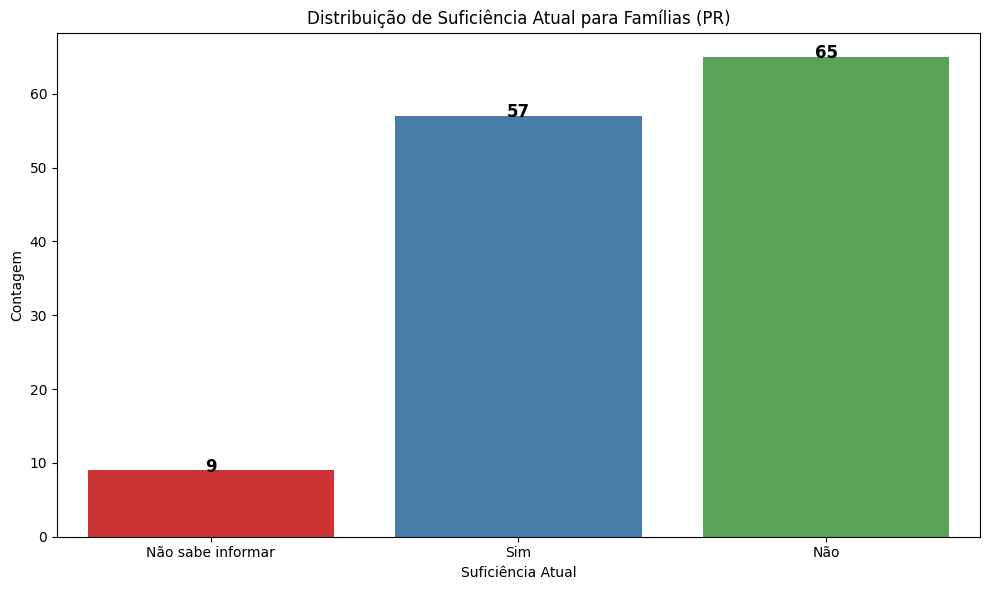

In [54]:
# Agrupando os dados para PR
df_agrupado_suficiente_pr = (
    df_pr.groupby(['num_atual_fam_suficiente'])
    .size()
    .reset_index(name='contagem')
    .sort_values(by='contagem', ascending=True)  # Ordenar em ordem crescente
)

# Plotando o gráfico de barras para PR
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='num_atual_fam_suficiente',
    y='contagem',
    data=df_agrupado_suficiente_pr,
    palette='Set1',
    hue='num_atual_fam_suficiente',
    legend=False
)

# Adicionando os valores dentro das barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Coordenada X (meio da barra)
        p.get_height() + 0.5,          # Coordenada Y (acima da barra)
        int(p.get_height()),           # Valor a ser exibido
        ha='center',                   # Centralizar o texto horizontalmente
        va='center',                   # Centralizar o texto verticalmente
        fontsize=12,                   # Tamanho da fonte
        color='black',                 # Cor do texto
        weight='bold'                  # Negrito
    )

# Adicionando título e rótulos
plt.title('Distribuição de Suficiência Atual para Famílias (PR)')
plt.xlabel('Suficiência Atual')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

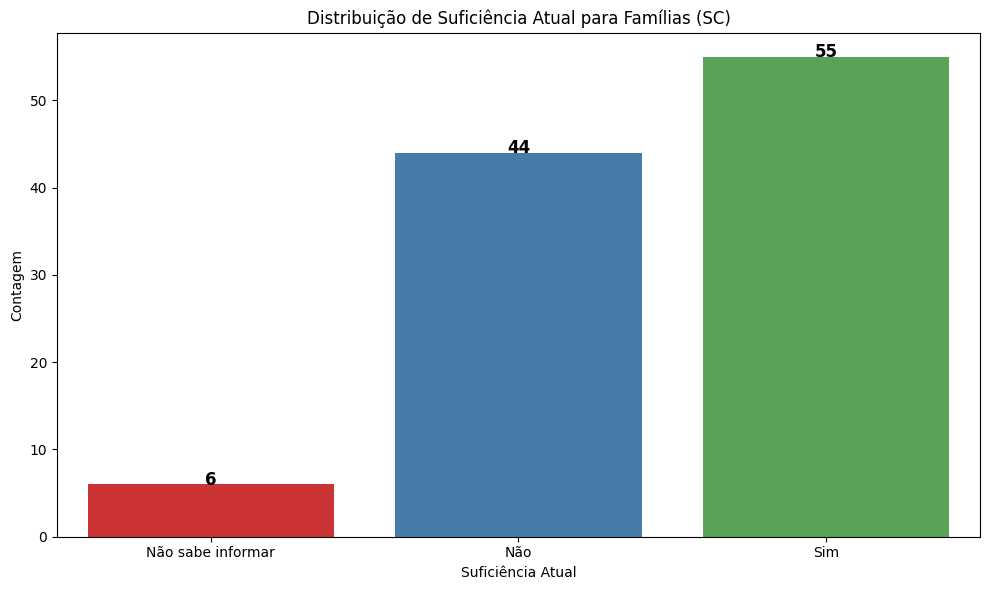

In [55]:
# Agrupando os dados para SC
df_agrupado_suficiente_sc = (
    df_sc.groupby(['num_atual_fam_suficiente'])
    .size()
    .reset_index(name='contagem')
    .sort_values(by='contagem', ascending=True)  # Ordenar em ordem crescente
)

# Plotando o gráfico de barras para SC
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='num_atual_fam_suficiente',
    y='contagem',
    data=df_agrupado_suficiente_sc,
    palette='Set1',
    hue='num_atual_fam_suficiente',
    legend=False
)

# Adicionando os valores dentro das barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Coordenada X (meio da barra)
        p.get_height() + 0.5,          # Coordenada Y (acima da barra)
        int(p.get_height()),           # Valor a ser exibido
        ha='center',                   # Centralizar o texto horizontalmente
        va='center',                   # Centralizar o texto verticalmente
        fontsize=12,                   # Tamanho da fonte
        color='black',                 # Cor do texto
        weight='bold'                  # Negrito
    )

# Adicionando título e rótulos
plt.title('Distribuição de Suficiência Atual para Famílias (SC)')
plt.xlabel('Suficiência Atual')
plt.ylabel('Contagem')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

### Custo mensal de manutenção

In [56]:
# Criar uma cópia independente de df_pr
df_pr = df_pr.copy()

# Corrigir os valores em strings com vírgula para ponto
df_pr['custo_manutencao'] = df_pr['custo_manutencao'].str.replace(',', '.')

# Remover espaços em branco (se houver)
df_pr['custo_manutencao'] = df_pr['custo_manutencao'].str.strip()

# Transformar em dados numéricos
df_pr['custo_manutencao'] = pd.to_numeric(df_pr['custo_manutencao'], errors='coerce')

# Alterar os valores NaN para 0
df_pr['custo_manutencao'] = df_pr['custo_manutencao'].fillna(0)

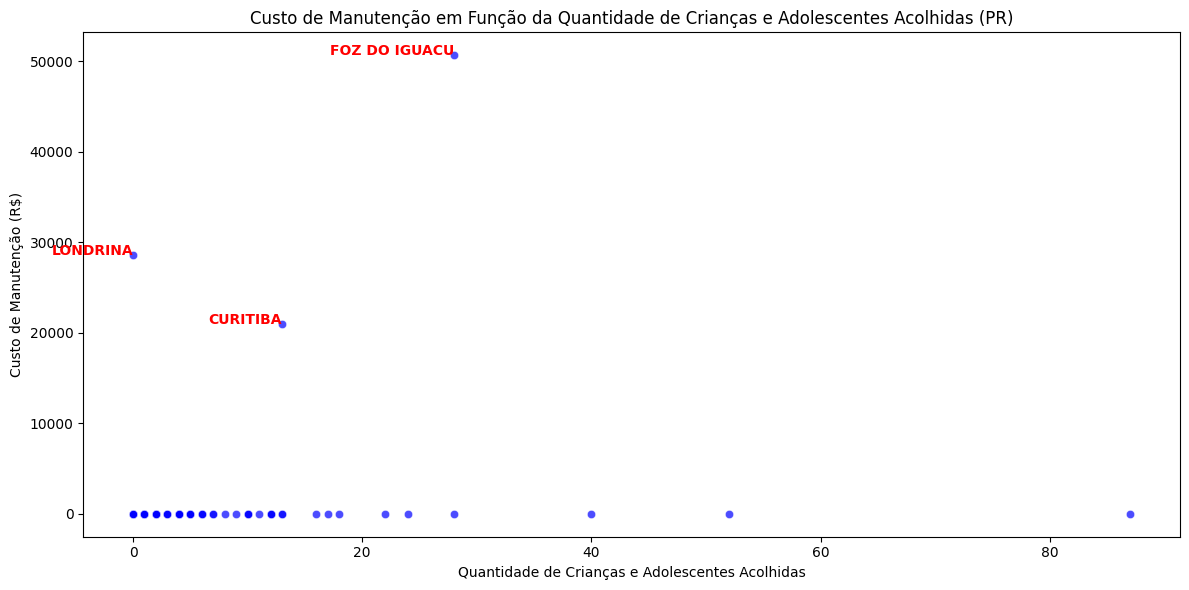

In [57]:
# Selecionar os municípios de PR com maiores custos (Top 3 - únicos com valores válidos)
top_custos_pr = df_pr.nlargest(3, 'custo_manutencao')

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_pr,
    x='qtd_criancas_acolhidas',
    y='custo_manutencao',
    color='blue',
    alpha=0.7
)

# Adicionar rótulos aos maiores custos
for i, row in top_custos_pr.iterrows():
    plt.text(
        row['qtd_criancas_acolhidas'],  # Coordenada X
        row['custo_manutencao'],  # Coordenada Y
        row['municipio'],  # Texto (nome do município)
        horizontalalignment='right',
        size='medium',
        color='red',
        weight='semibold'
    )

# Configurar o gráfico
plt.title('Custo de Manutenção em Função da Quantidade de Crianças e Adolescentes Acolhidas (PR)')
plt.xlabel('Quantidade de Crianças e Adolescentes Acolhidas')
plt.ylabel('Custo de Manutenção (R$)')
plt.tight_layout()
plt.show()

In [58]:
# Criar uma cópia independente de df_sc
df_sc = df_sc.copy()

# Corrigir os valores em strings com vírgula para ponto
df_sc['custo_manutencao'] = df_sc['custo_manutencao'].str.replace(',', '.')

# Remover espaços em branco (se houver)
df_sc['custo_manutencao'] = df_sc['custo_manutencao'].str.strip()

# Transformar em dados numéricos
df_sc['custo_manutencao'] = pd.to_numeric(df_sc['custo_manutencao'], errors='coerce')

# Alterar os valores NaN para 0
df_sc['custo_manutencao'] = df_sc['custo_manutencao'].fillna(0)

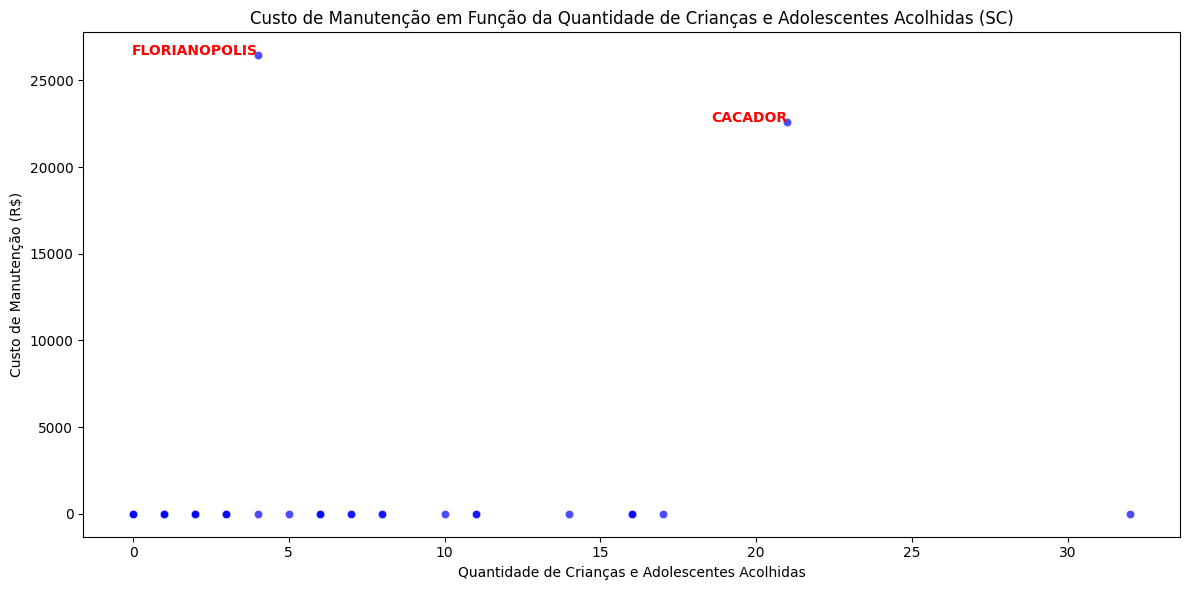

In [59]:
# Selecionar os municípios de SC com maiores custos (Top 2 - únicos com valores válidos)
top_custos_sc = df_sc.nlargest(2, 'custo_manutencao')

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_sc,
    x='qtd_criancas_acolhidas',
    y='custo_manutencao',
    color='blue',
    alpha=0.7
)

# Adicionar rótulos aos maiores custos
for i, row in top_custos_sc.iterrows():
    plt.text(
        row['qtd_criancas_acolhidas'],  # Coordenada X
        row['custo_manutencao'],  # Coordenada Y
        row['municipio'],  # Texto (nome do município)
        horizontalalignment='right',
        size='medium',
        color='red',
        weight='semibold'
    )

# Configurar o gráfico
plt.title('Custo de Manutenção em Função da Quantidade de Crianças e Adolescentes Acolhidas (SC)')
plt.xlabel('Quantidade de Crianças e Adolescentes Acolhidas')
plt.ylabel('Custo de Manutenção (R$)')
plt.tight_layout()
plt.show()

### Situação do imóvel onde funciona a sede do SFA

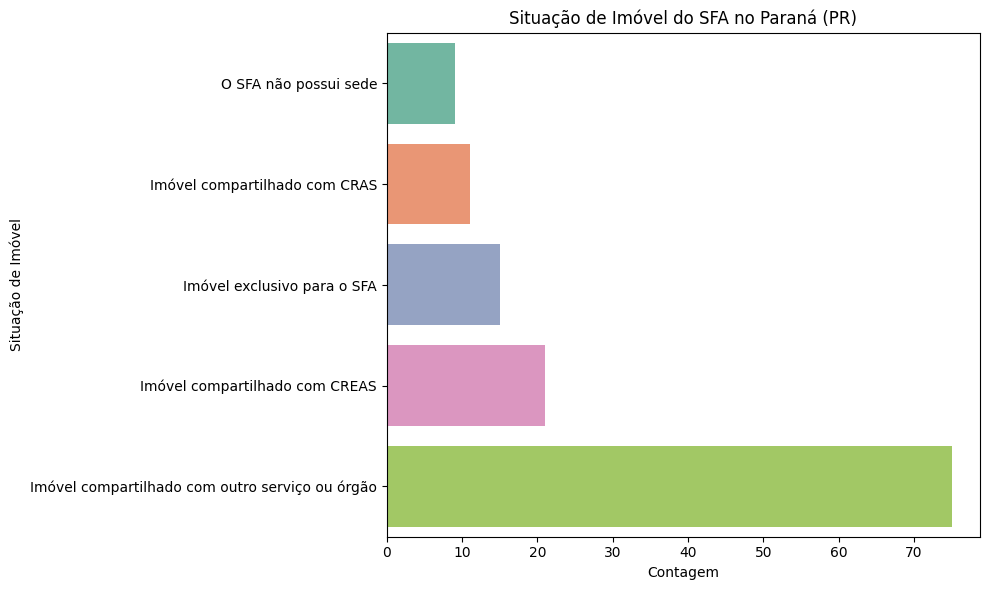

In [60]:
# Agrupar os dados para o Paraná (PR) por situação do imóvel
df_imovel_pr = df_pr.groupby('imovel_sede_saf').size().reset_index(name='contagem')

# Ordenar os dados em ordem crescente
df_imovel_pr = df_imovel_pr.sort_values(by='contagem', ascending=True)

# Plotar o gráfico de barras para PR
plt.figure(figsize=(10, 6))
sns.barplot(
    x='contagem',
    y='imovel_sede_saf',
    data=df_imovel_pr,
    palette='Set2',
    hue='contagem',
    legend=False
)

# Configurar o gráfico
plt.title("Situação de Imóvel do SFA no Paraná (PR)")
plt.xlabel("Contagem")
plt.ylabel("Situação de Imóvel")
plt.tight_layout()

# Mostrar o gráfico
plt.show()

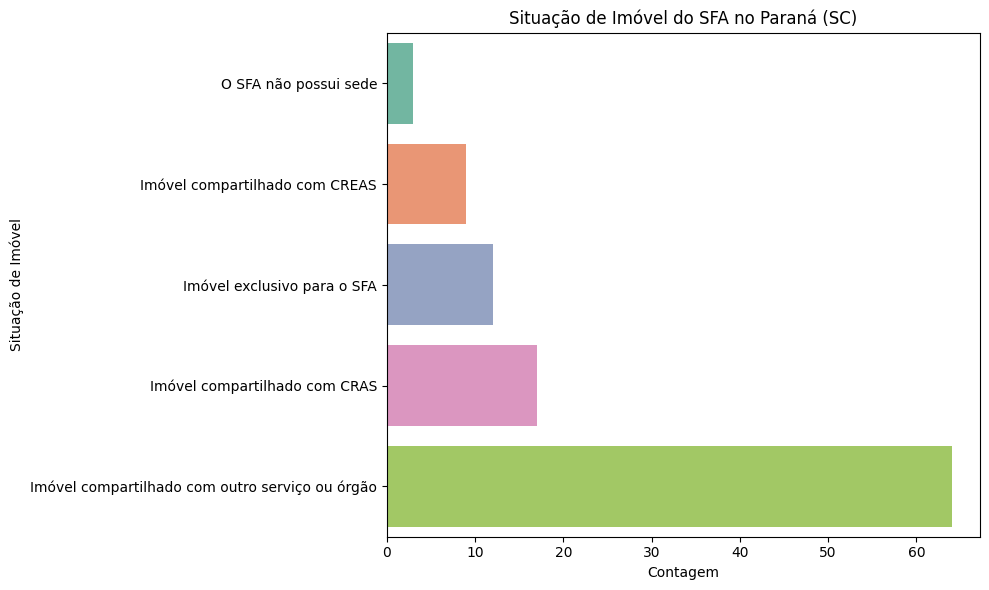

In [61]:
# Agrupar os dados para Santa Catarina (SC) por situação do imóvel
df_imovel_sc = df_sc.groupby('imovel_sede_saf').size().reset_index(name='contagem')

# Ordenar os dados em ordem crescente
df_imovel_sc = df_imovel_sc.sort_values(by='contagem', ascending=True)

# Plotar o gráfico de barras para SC
plt.figure(figsize=(10, 6))
sns.barplot(
    x='contagem',
    y='imovel_sede_saf',
    data=df_imovel_sc,
    palette='Set2',
    hue='contagem',
    legend=False
)

# Configurar o gráfico
plt.title("Situação de Imóvel do SFA no Paraná (SC)")
plt.xlabel("Contagem")
plt.ylabel("Situação de Imóvel")
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Equipe técnica exclusiva

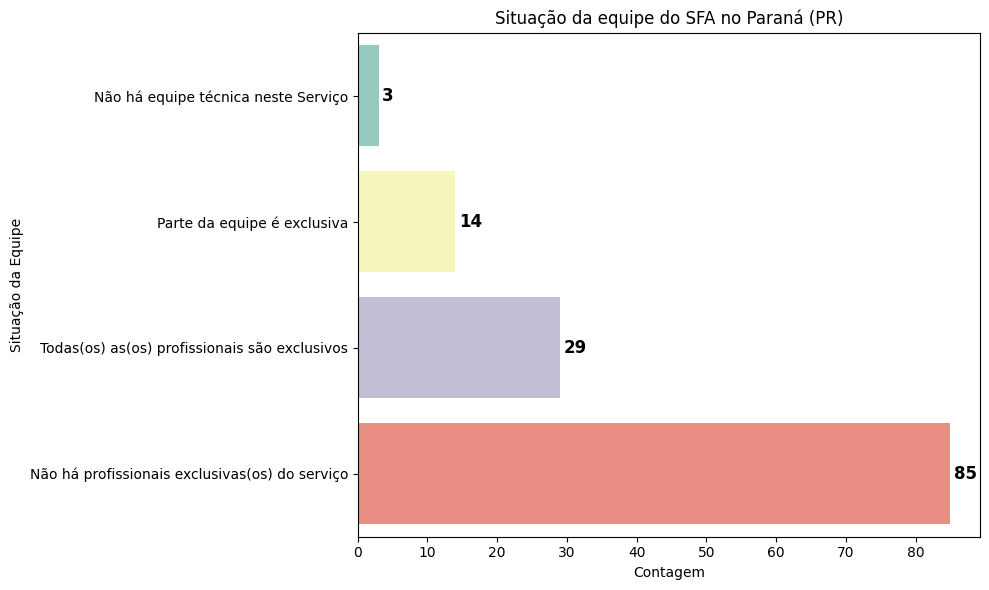

In [62]:
# Agrupar os dados para o Paraná (PR) por situação da equipe do SFA
df_equipe_pr = df_pr.groupby('equipe_tec_exclusiva_saf').size().reset_index(name='contagem')

# Ordenar os dados em ordem crescente
df_equipe_pr = df_equipe_pr.sort_values(by='contagem', ascending=True)

# Plotar o gráfico de barras para PR
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='contagem',
    y='equipe_tec_exclusiva_saf',
    data=df_equipe_pr,
    palette='Set3',
    hue='contagem',
    legend=False
)

# Adicionar os valores dentro das barras
for p in ax.patches:
    ax.text(
        p.get_width() + 0.5,  # Posicionar o texto ao lado da barra
        p.get_y() + p.get_height() / 2,  # Centralizar o texto verticalmente
        int(p.get_width()),  # Valor a ser exibido
        ha='left',  # Alinhar à esquerda
        va='center',  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color='black',  # Cor do texto
        weight='bold'  # Negrito
    )

# Configurar o gráfico
plt.title("Situação da equipe do SFA no Paraná (PR)")
plt.xlabel("Contagem")
plt.ylabel("Situação da Equipe")
plt.tight_layout()

# Mostrar o gráfico
plt.show()

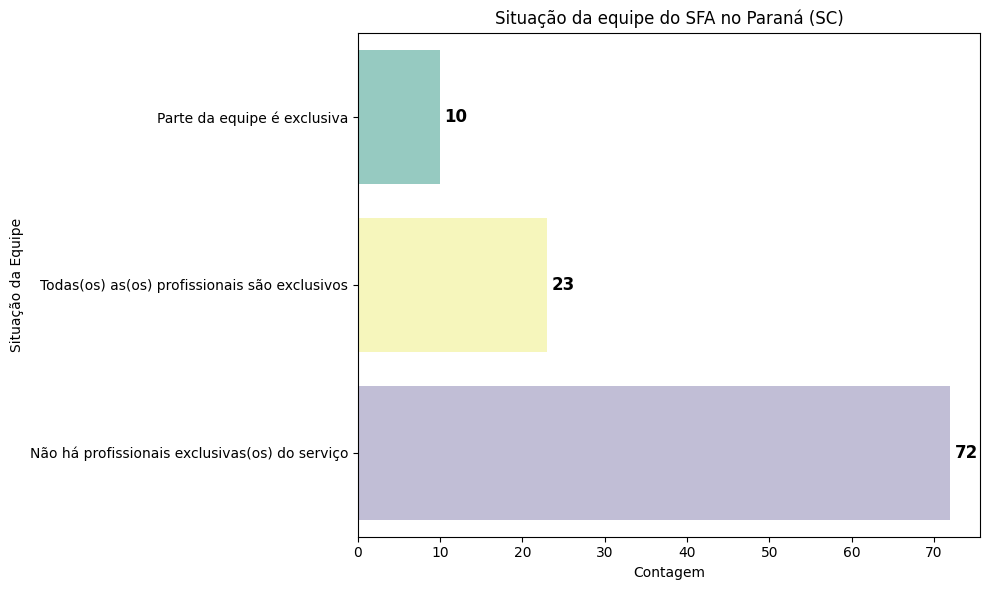

In [63]:
# Agrupar os dados para Santa Catarina (SC) por situação da equipe do SFA
df_equipe_sc = df_sc.groupby('equipe_tec_exclusiva_saf').size().reset_index(name='contagem')

# Ordenar os dados em ordem crescente
df_equipe_sc = df_equipe_sc.sort_values(by='contagem', ascending=True)

# Plotar o gráfico de barras para SC
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='contagem',
    y='equipe_tec_exclusiva_saf',
    data=df_equipe_sc,
    palette='Set3',
    hue='contagem',
    legend=False
)

# Adicionar os valores dentro das barras
for p in ax.patches:
    ax.text(
        p.get_width() + 0.5,  # Posicionar o texto ao lado da barra
        p.get_y() + p.get_height() / 2,  # Centralizar o texto verticalmente
        int(p.get_width()),  # Valor a ser exibido
        ha='left',  # Alinhar à esquerda
        va='center',  # Centralizar verticalmente
        fontsize=12,  # Tamanho da fonte
        color='black',  # Cor do texto
        weight='bold'  # Negrito
    )

# Configurar o gráfico
plt.title("Situação da equipe do SFA no Paraná (SC)")
plt.xlabel("Contagem")
plt.ylabel("Situação da Equipe")
plt.tight_layout()

# Mostrar o gráfico
plt.show()